In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import trim_mean
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("files/data.csv")
not_important = ['id','uri','track_href','analysis_url','duration_ms','type']
dfc = df.drop(columns=not_important)

In [4]:
# Sample -> Subset from a larger dataset
# Population -> (Theoretical) set of data
# Random sampling -> Each available member of the sample has the same change of being chosen.
# With replacement -> Observations are put back
# Without replacement -> Observations are not put back
# Data quality > Data quantity
# Sample bias -> Sample was different in some meaningful/non-random way from the larger population
# Bias -> Measurement/Sampling errors produced by the measuring/sampling process.
# Random selection -> 
# Stratified sampling -> Population divided in strata, and random sample in each strata.
# Selection bias -> Selective choosing data in a way that the conclusion is misleading.

In [ ]:
# Sampling distribution of a Statistic -> Distribution of some sample statistic over many samples drawn from the same population.

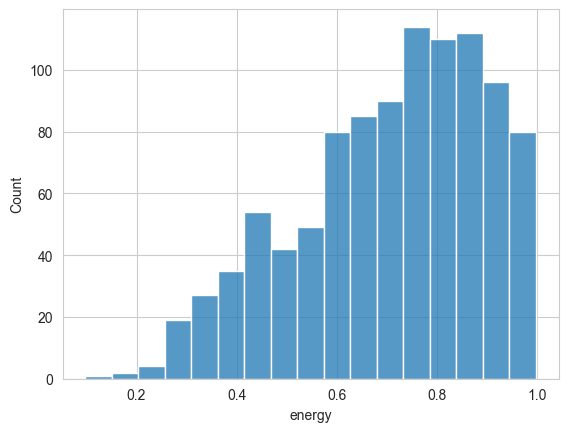

In [5]:
# Sample distribution
energy = dfc[dfc['genre']=='garage']['energy']
_ = sns.histplot(energy)

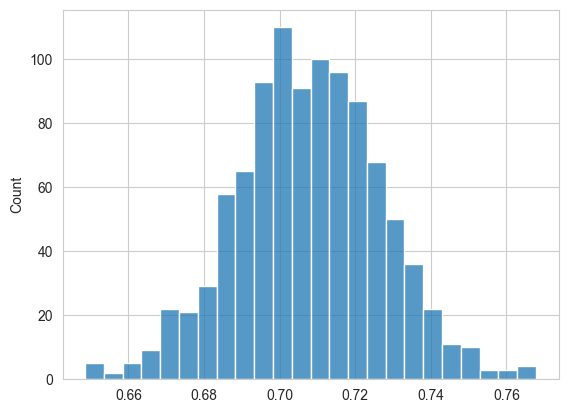

In [12]:
# Sample distribution of the mean for few sample sizes
# As k increases, the deviation in the sample distribution of the mean is smaller.
# Central limit theorem -> Means drawn from multiple samples resemble normal distribution, if the sample size is great enough(at least 30), and the departure from normality is not that great.
# Allows normal aproximation like t-student for hypothesis testing.
# Bootstrap more utilized in data science.
k = 100
n = 1000
sample_dist_mean = [energy.sample(n=k,replace=True,).mean() for _ in range(n)]
_ = sns.histplot(sample_dist_mean)

In [15]:
# Standard Error -> Variability in sample distribution
# To reduce standard error by a fact of two, sample size must be 4x.
# Standard error can be calculated as the std of the bootstrap distribution
def standard_error(x:pd.Series):
    
    s = x.std()
    return s / np.square(len(x))

In [22]:
# Bootstrap -> Way of estimating sampling distribution of a statistic
# Draw samples with replacement!!!

sample_dist_median = np.array([energy.sample(n=k,replace=True,).median() for _ in range(n)])
print(f"Original median {energy.median()}")
print(f"Bias {sample_dist_median.mean() - energy.mean()}")
print(f"Std. error {sample_dist_median.std()}")

# Can be used in multivariate data, where the rows are the data points.
#The bootstrap does not compensate for a small sample size; it does
#not create new data, nor does it fill in holes in an existing data set.
#It merely informs us about how lots of additional samples would
#behave when drawn from a population like our original sample.


Original median 0.741
Bias 0.031560799999999944
Std. error 0.024372604620762236


In [25]:
# Confidence intervals
# Point estimates dont provide uncertainty about values
# An 95% confidence interval in a sample estimate should countain simliar sample estimate 95% of the time.
# trim [(100 -x)/2] at both ends.

In [40]:
def conf_interval(pct):
    """Returns left and right side"""
    return (1 - pct)/2, 1 - (1 - pct)/2

In [38]:
sample_dist_mean = np.array([energy.sample(n=k,replace=True,).mean() for _ in range(n)])
x = 0.95
left,right =conf_interval(x)
leftq, rightq = np.quantile(sample_dist_mean,left), np.quantile(sample_dist_mean,right)

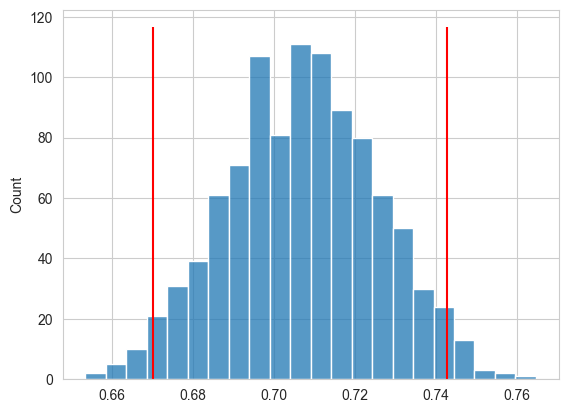

In [53]:
ax = sns.histplot(sample_dist_mean)
ymin, ymax= ax.get_ylim()
ax.vlines(x=leftq,ymin=ymin,ymax=ymax,color='red')
ax.vlines(x=rightq,ymin=ymin,ymax=ymax,color='red')

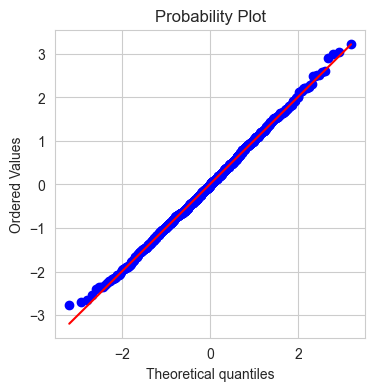

In [62]:
# Normal distribution
# Standard Normal -> N(0,1)
# Standardization(x) : (x - mean)/std
# QQ plot -> How close it is to the normal distribution (theoretical)
# Converting data to z-scores (i.e., standardizing or normalizing the data) does not make the data normally distributed
from scipy import stats
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=1000)
_ = stats.probplot(norm_sample, plot=ax)

In [64]:
# Long tailed distributions
# Skewness -> Assymetric (left or right)
# Assuming a normal distribution can lead to underestimation of extreme events

In [ ]:
# Student-T distribution
# Like normal, but with thicker tails. The larger the sample size, the more normal it is. More robust to outliers
# Sample distribution approximator

In [67]:
# Binomial distribution
# Yes/No questions
# Flipping a coin 10 times is a binomial with 10 trials.
# Binomial -> Number of sucessess, given n trials and probability of each trial being a success.
# With enough data, similar to normal dsitribution.
from scipy.stats import binom
x = 2
trials = 5
p = 0.1
print(binom.pmf(x,trials,p)) # Probability of being x (Probability mass function)
print(binom.cdf(x,trials,p)) # Probability of being equal or smaller than x (Continuous densitty function)

0.07289999999999992
0.99144


In [ ]:
# Chi-Square
# Departure from expectation
# Expectation is defined loosely as “nothing unusual or of note in the data (Null hypothesis)
# Chi Square -> Measure the extent of which results departe from the null hypothesis of independence
# Useful for checking if treatments differ 
# Low chi-square test -> Follow expected distribution

In [68]:
# F-distribution
# Multiple treatments
# Similar to chi-square, but with countinuous variables instead of counts.
# Check to which extent the difference between group means are greater than what e might expect from random variation (ANOVA)

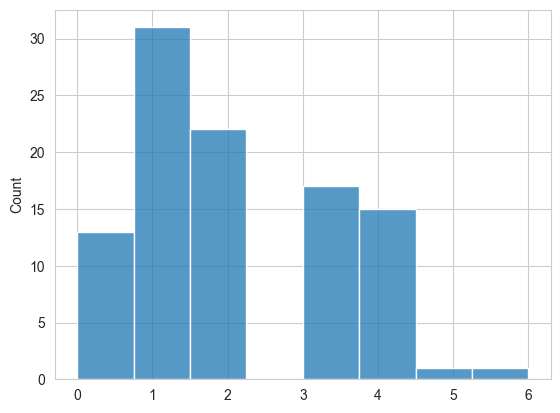

In [72]:
# Poisson
# Events spread over time/space
# lambda -> Average number of events per period of time
# Lambda is the mean and the variance.
# In this example, simulates for 100 units of time, how many would occur at that unit of time.
queueing = stats.poisson.rvs(2, size=100)
_ = sns.histplot(queueing)

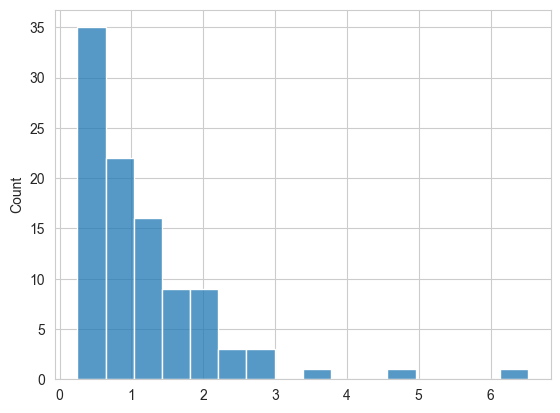

In [77]:
# Exponential distribution
# Distribution of time between events.
# 0.2 -> Number of events por time period, on average, is 0.2
# Simulates 100 intervals between units of time where the average rate of incoming calls is 0.2 per minute
# KEY ASSUMPTION: Rate lambda remains constant independent of time.
wait = stats.expon.rvs(0.2, size=100)
_ = sns.histplot(wait)

In [ ]:
# Weibull distribution
# Event rate changes over time
# Mechanincal failure -> Risk of failure increases over time
# Weibull distribution -> Extension to exponential, where the rate is allowed to change, with a parameter beta
# If beta > 1, then the chance of event increase over time, else decreases

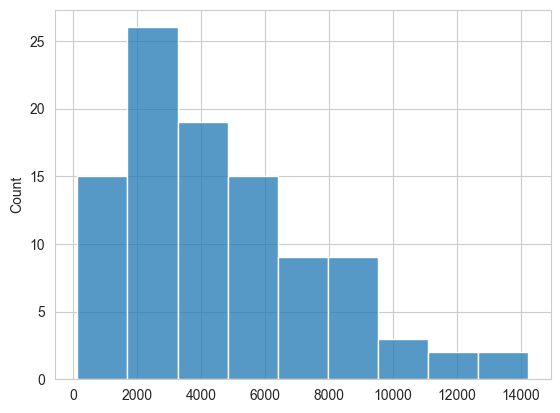

In [78]:
# 100 numbers(100 lifetimes),shape 1.5 and characeristic life(beta) 5000
wb = stats.weibull_min.rvs(1.5, scale=5000, size=100)
_ = sns.histplot(wb)